In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from Utils import plotMetricsGraphComparison 
import joblib


In [2]:
# Read columns used to build models
columns = pd.read_csv('Data/basic_model_columns.csv')['Columns'].to_list()

In [3]:
X_train = pd.read_csv('Data/X_train_undersampled_data.csv')[columns]
X_test = pd.read_csv('Data/X_test.csv')[columns]
Y_train = pd.read_csv('Data/y_train_undersampled_data.csv')
Y_test = pd.read_csv('Data/y_test.csv')

test_metrics = pd.DataFrame(columns=['Classification Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

### Decision Tree Classification Model (Without Bagging)

In [4]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeModel = DecisionTreeClassifier(random_state=47)
decisionTreeModel.fit(X_train, Y_train)

# Predict the output based on our training and testing dataset
Y_train_pred_dt = decisionTreeModel.predict(X_train)
Y_test_pred_dt = decisionTreeModel.predict(X_test)

In [5]:
test_metric = {
    "Classification Model": "Decision Tree",
    "Accuracy": accuracy_score(Y_test, Y_test_pred_dt),
    "Precision": precision_score(Y_test, Y_test_pred_dt),
    "Recall": recall_score(Y_test, Y_test_pred_dt),
    "F1 Score": f1_score(Y_test, Y_test_pred_dt)
}

test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993


### Applying Adaboost to Improve Classification Performance

Previously, we utilized a decision tree as one of our classification techniques. A potential enhancement is to apply AdaBoost, which is an ensemble boosting technique. Boosting helps improve the accuracy of decision trees by focusing on instances that the previous models misclassified. This method not only increases accuracy but also aims to reduce bias rather than variance.

To enhance the decision tree model via boosting, we will employ the AdaBoost model, which uses a series of weak learners and focuses on correcting the mistakes of the previous models in the sequence, thus adapting to the more challenging aspects of the classification problem.

# Applying AdaBoost
Implementation of AdaBoost with a decision tree as the base learner. We train the AdaBoost model and then evaluate its performance, comparing it to the initial decision tree model to observe any improvements.


In [6]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier(max_depth=1, random_state=47)

adaBoostModel = AdaBoostClassifier(estimator=base_estimator,
                                   n_estimators=50, 
                                   random_state=47)
adaBoostModel.fit(X_train, Y_train.values.ravel())


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [7]:
Y_train_pred_before_feature_engineering = adaBoostModel.predict(X_train)
Y_test_pred_before_feature_engineering = adaBoostModel.predict(X_test)

Train and Test Data Confusion Matrix:


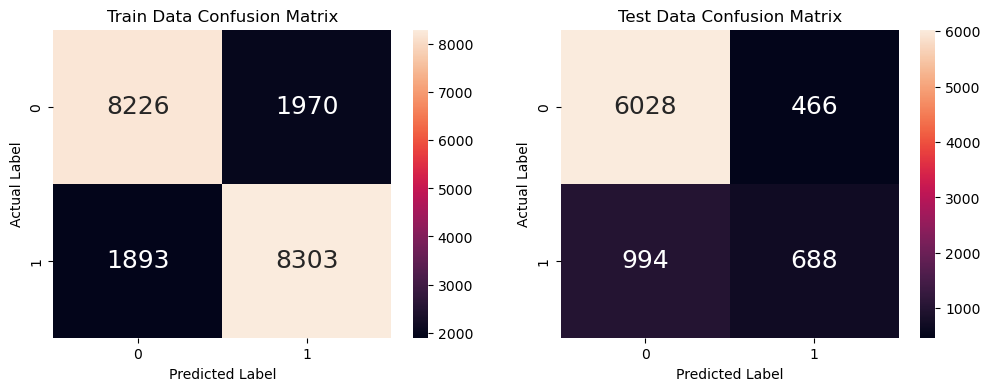

In [8]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred_before_feature_engineering),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred_before_feature_engineering),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [9]:
test_metric = {
    "Classification Model": "Adaboost (Before Feature Engineering)",
    "Accuracy": accuracy_score(Y_test, Y_test_pred_before_feature_engineering),
    "Precision": precision_score(Y_test, Y_test_pred_before_feature_engineering),
    "Recall": recall_score(Y_test, Y_test_pred_before_feature_engineering),
    "F1 Score": f1_score(Y_test, Y_test_pred_before_feature_engineering)
}

# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

In [10]:
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
1,Adaboost (Before Feature Engineering),0.821429,0.596187,0.409037,0.485190


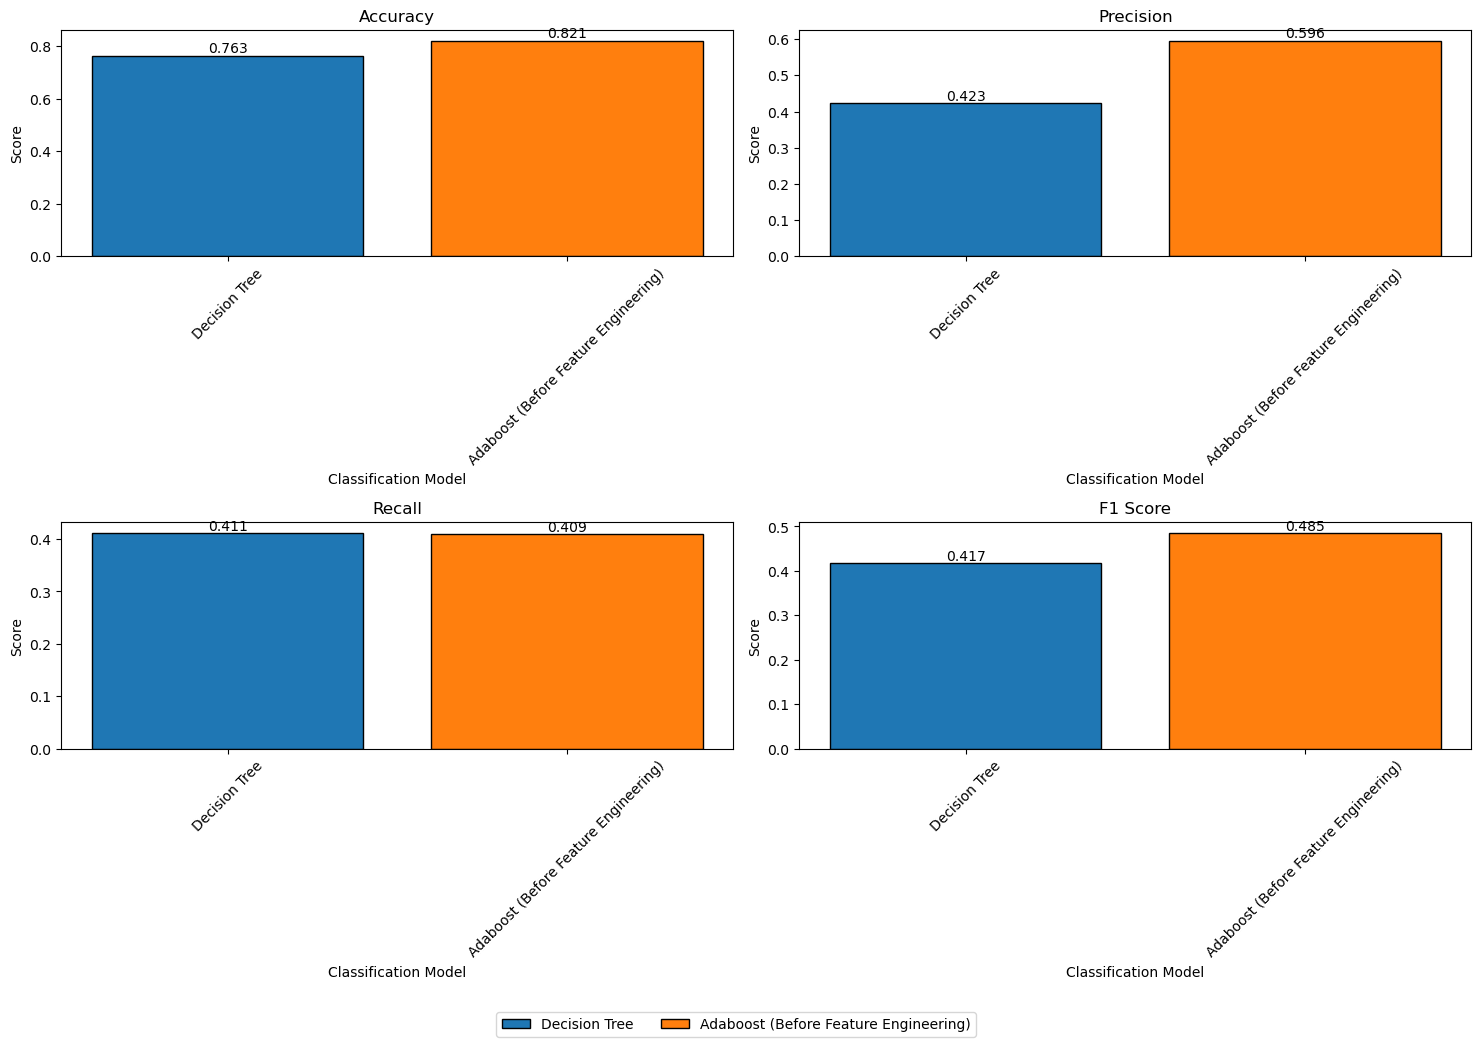

In [11]:
plotMetricsGraphComparison(test_metrics)


After applying boosting to enhance the Decision Tree, we can observe that AdaBoost exhibits higher accuracy and precision than the initial decision tree model, demonstrating a significant improvement in overall model performance.

However, similar to the decision tree model, the recall score remains low with AdaBoost. This indicates that despite the improved accuracy and precision, both models still only correctly identify a low percentage of the actual positive labels. Such low recall scores could stem from factors like data imbalances or the characteristics of the data features used in training. To address these issues and potentially improve the model's ability to recognize positive cases, we will explore feature engineering to develop new attributes that might better capture the nuances in the data.

Feature engineering notebook can be found at: [Feature Engineering Notebook](./Feature%20Engineering.ipynb).


### Load Data After Feature Engineering

In [12]:
X_train = pd.read_csv('Data/X_train_engineered.csv')
X_test = pd.read_csv('Data/X_test_engineered.csv')
Y_train = pd.read_csv('Data/y_train_undersampled_data.csv')
Y_test = pd.read_csv('Data/y_test.csv')

print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (20392, 1) (20392, 75)
Test Set  : (8176, 1) (8176, 75)


### Evaluating feature engineering

In [13]:
adaBoostModel.fit(X_train, Y_train.values.ravel())


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [14]:
Y_train_pred_after_feature_engineering = adaBoostModel.predict(X_train)
Y_test_pred_after_feature_engineering = adaBoostModel.predict(X_test)

Train and Test Data Confusion Matrix:


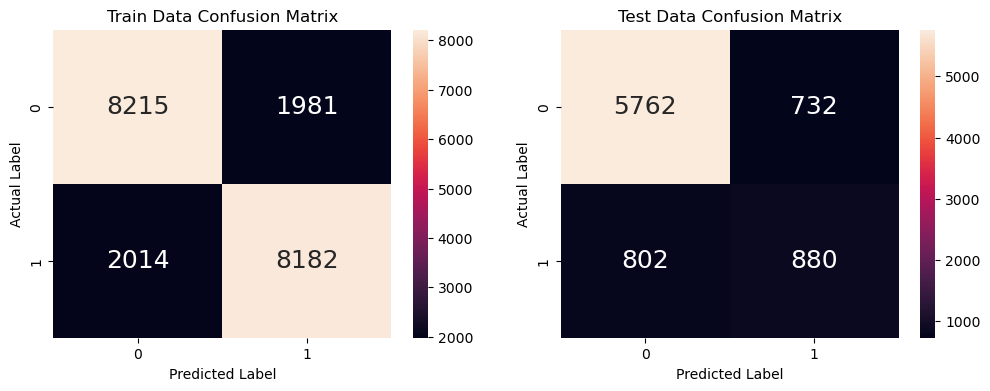

In [15]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred_after_feature_engineering),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred_after_feature_engineering),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [16]:
test_metric = {
    "Classification Model": "Adaboost (After Feature Engineering)",
    "Accuracy": accuracy_score(Y_test, Y_test_pred_after_feature_engineering),
    "Precision": precision_score(Y_test, Y_test_pred_after_feature_engineering),
    "Recall": recall_score(Y_test, Y_test_pred_after_feature_engineering),
    "F1 Score": f1_score(Y_test, Y_test_pred_after_feature_engineering)
}

# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

In [17]:
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
2,Adaboost (After Feature Engineering),0.812378,0.545906,0.523187,0.534305
1,Adaboost (Before Feature Engineering),0.821429,0.596187,0.409037,0.485190


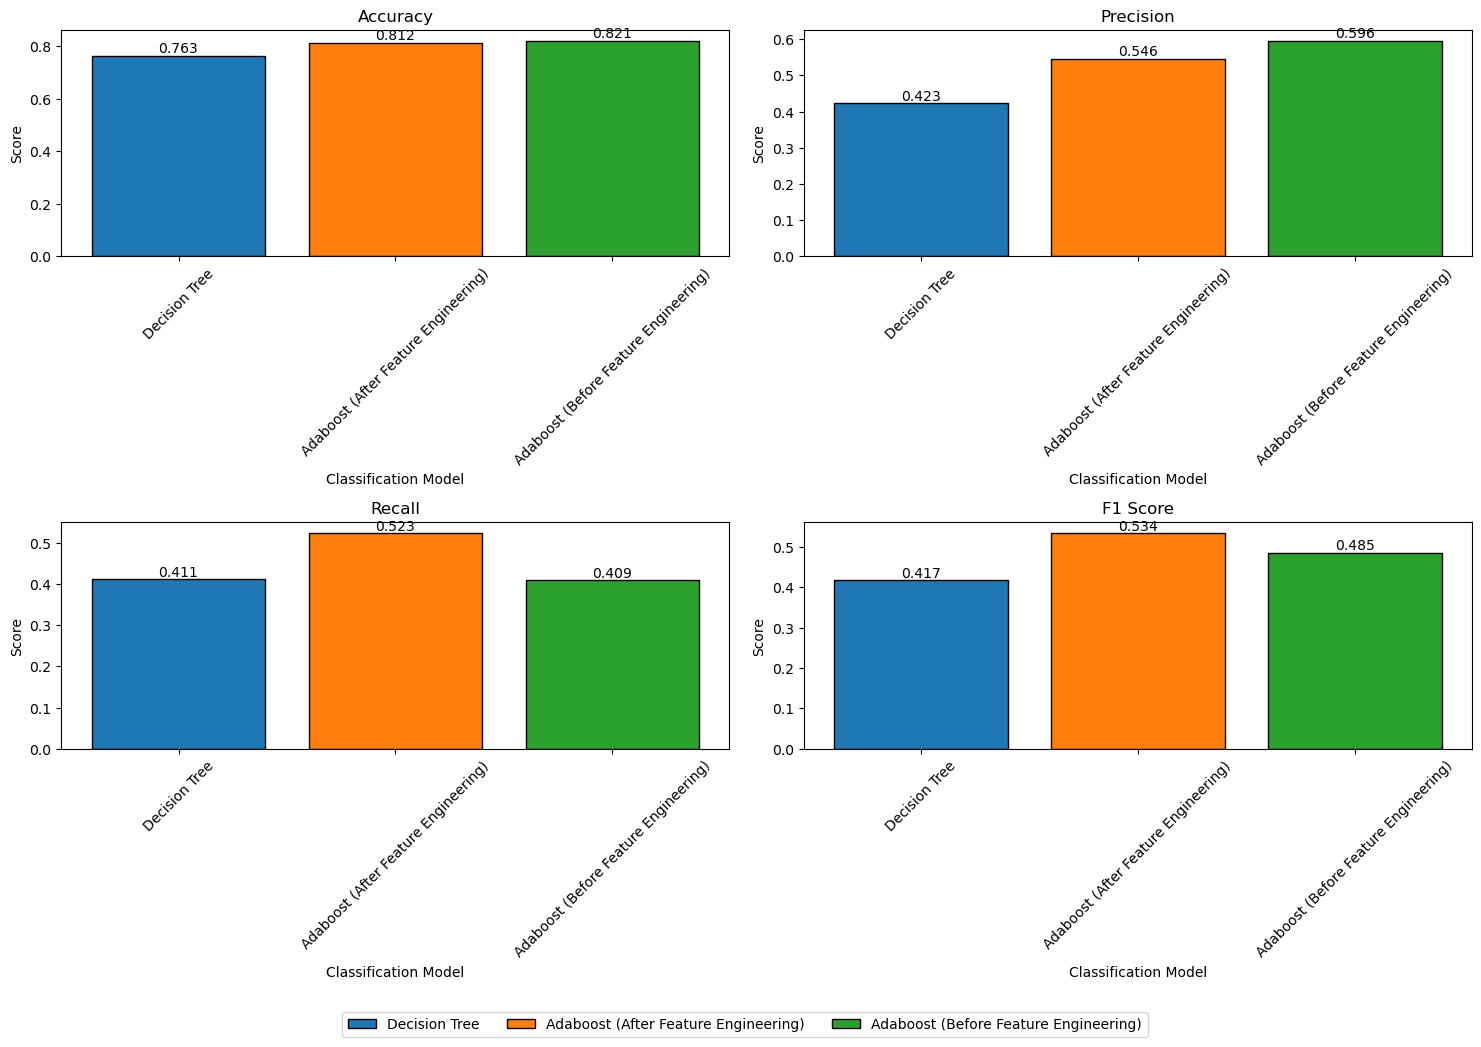

In [18]:
plotMetricsGraphComparison(test_metrics)

# Feature Selection Techniques
Detail the various feature selection methods used (RFE, forward selection, backward elimination, and Select K Best) and their purpose in refining the model by removing irrelevant or less important features.


In [19]:
from FeatureSelectionUtils import feature_selection_using_rfecv_on_f1score, forward_selection_with_metrics, backward_elimination_with_metrics, select_k_best_with_mutual_info, export_final_selected_features_to_csv, get_selected_features_as_list, feature_selection_using_rfecv_on_accuracyscore

#### RFE Using F1 Score 

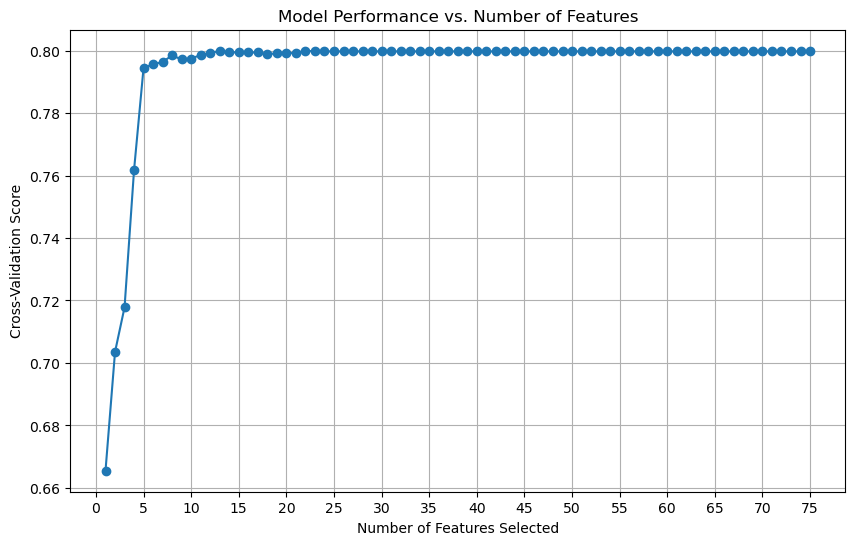

Optimal number of features based on F1 Score: 13


In [20]:
featuresForBestRunUsingF1Score = feature_selection_using_rfecv_on_f1score(adaBoostModel, X_train, Y_train)

##### Getting selected features as Array

In [21]:
selected_features = get_selected_features_as_list(featuresForBestRunUsingF1Score)
print(selected_features)

['have_special_requests', 'perc_weekday_nights_scaled', 'room_type_reserved_room_type 1', 'market_segment_type_aviation', 'market_segment_type_corporate', 'market_segment_type_offline', 'market_segment_type_online', 'required_car_parking_space', 'no_of_adults_scaled', 'no_of_week_nights_scaled', 'no_of_special_requests_scaled', 'lead_time_scaled', 'avg_price_per_room_scaled']


##### Creating training and test data using only selected features

In [22]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [23]:
adaBoostModel.fit(X_train_selected, Y_train.values.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [24]:
# Predict the output based on our training and testing dataset
Y_train_pred = adaBoostModel.predict(X_train_selected)
Y_test_pred = adaBoostModel.predict(X_test_selected)

Train and Test Data Confusion Matrix:


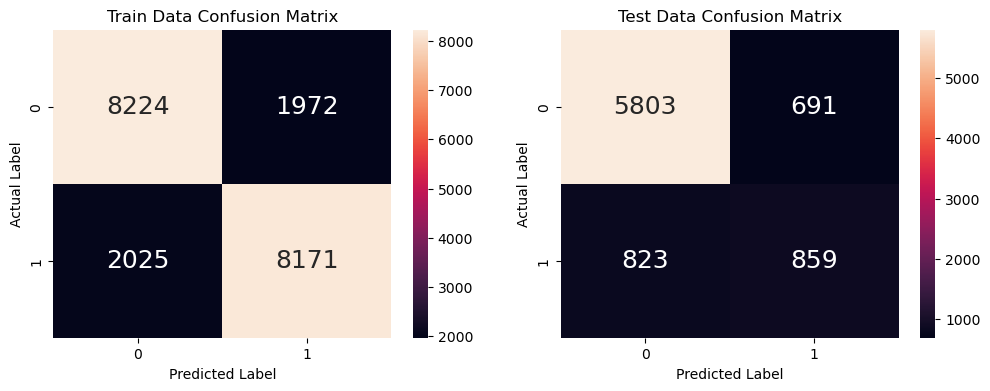

In [25]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [26]:
test_metric = {
    "Classification Model": "Adaboost + RFE (F1) Selection",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
1,Adaboost (After Feature Engineering),0.812378,0.545906,0.523187,0.534305
3,Adaboost + RFE (F1) Selection,0.814824,0.554194,0.510702,0.531559
2,Adaboost (Before Feature Engineering),0.821429,0.596187,0.409037,0.485190


#### RFE Using Accuracy Score 

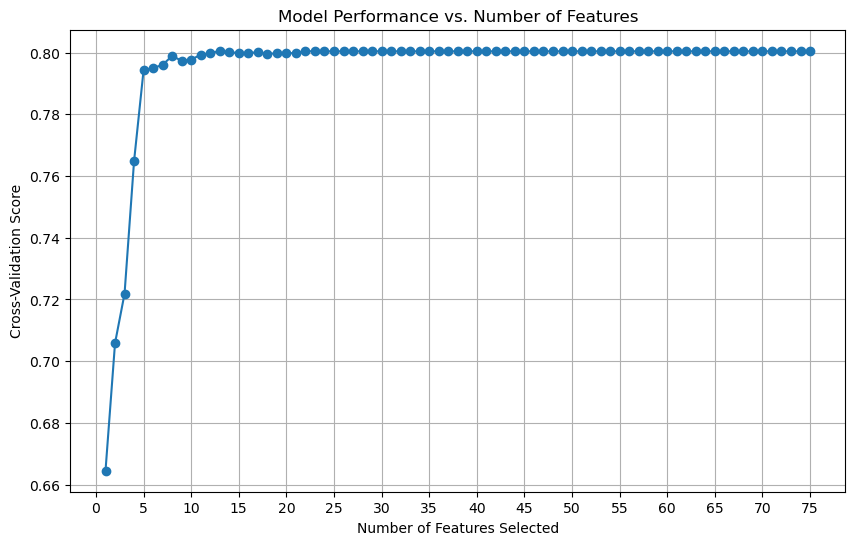

Optimal number of features based on Accuracy Score: 13


In [27]:
featuresForBestRunUsingAccuracyScore = feature_selection_using_rfecv_on_accuracyscore(adaBoostModel, X_train, Y_train)

##### Getting selected features as Array

In [28]:
selected_features = get_selected_features_as_list(featuresForBestRunUsingAccuracyScore)
print(selected_features)

['have_special_requests', 'perc_weekday_nights_scaled', 'room_type_reserved_room_type 1', 'market_segment_type_aviation', 'market_segment_type_corporate', 'market_segment_type_offline', 'market_segment_type_online', 'required_car_parking_space', 'no_of_adults_scaled', 'no_of_week_nights_scaled', 'no_of_special_requests_scaled', 'lead_time_scaled', 'avg_price_per_room_scaled']


##### Creating training and test data using only selected features

In [29]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [30]:
adaBoostModel.fit(X_train_selected, Y_train.values.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [31]:
# Predict the output based on our training and testing dataset
Y_train_pred = adaBoostModel.predict(X_train_selected)
Y_test_pred = adaBoostModel.predict(X_test_selected)

Train and Test Data Confusion Matrix:


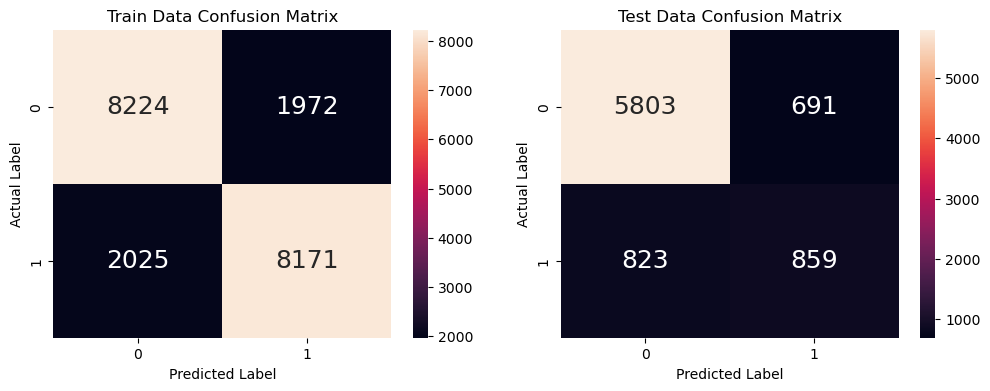

In [32]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [33]:
test_metric = {
    "Classification Model": "Adaboost + RFE (Accuracy) Selection",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}
# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
1,Adaboost (After Feature Engineering),0.812378,0.545906,0.523187,0.534305
2,Adaboost + RFE (F1) Selection,0.814824,0.554194,0.510702,0.531559
4,Adaboost + RFE (Accuracy) Selection,0.814824,0.554194,0.510702,0.531559
3,Adaboost (Before Feature Engineering),0.821429,0.596187,0.409037,0.485190


#### Forward Selection

In [34]:
featuresForBestRunUsingForwardSelection = forward_selection_with_metrics(X_train, Y_train, X_test, Y_test, adaBoostModel)

Selected features: ['lead_time_cat_200 to 300', 'no_of_weekend_nights_scaled', 'booking_dayofweek_3', 'cancellation_type_no_booking', 'market_segment_type_complementary']
Best accuracy: 0.7965998043052838


##### Getting selected features as Array

In [35]:
selected_features = get_selected_features_as_list(featuresForBestRunUsingForwardSelection)
print(selected_features)

['cancellation_type_no_booking', 'lead_time_cat_200 to 300', 'booking_dayofweek_3', 'market_segment_type_complementary', 'no_of_weekend_nights_scaled']


##### Creating training and test data using only selected features

In [36]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [37]:
adaBoostModel.fit(X_train_selected, Y_train.values.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [38]:
# Predict the output based on our training and testing dataset
Y_train_pred = adaBoostModel.predict(X_train_selected)
Y_test_pred = adaBoostModel.predict(X_test_selected)

Train and Test Data Confusion Matrix:


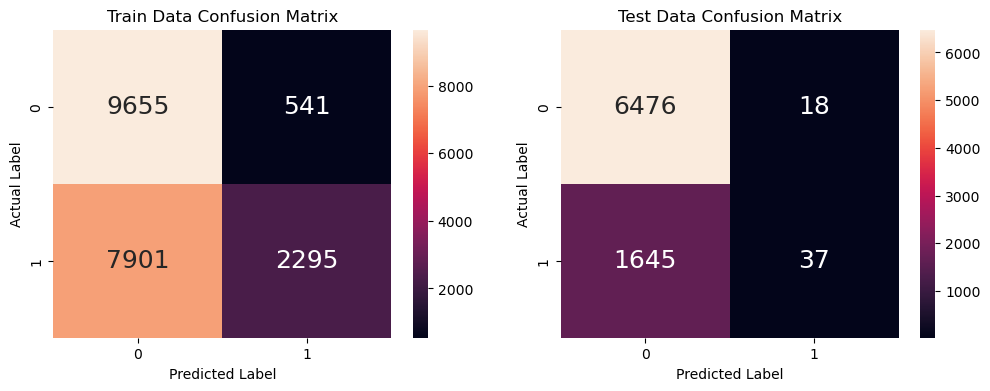

In [39]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [40]:
test_metric = {
    "Classification Model": "Adaboost + Forward Selection",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
5,Adaboost + Forward Selection,0.796600,0.672727,0.021998,0.042602
1,Adaboost (After Feature Engineering),0.812378,0.545906,0.523187,0.534305
2,Adaboost + RFE (F1) Selection,0.814824,0.554194,0.510702,0.531559
3,Adaboost + RFE (Accuracy) Selection,0.814824,0.554194,0.510702,0.531559
4,Adaboost (Before Feature Engineering),0.821429,0.596187,0.409037,0.485190


#### Backward Selection

In [41]:
featuresForBestRunUsingBackwardSelection = backward_elimination_with_metrics(X_train, Y_train, X_test, Y_test, adaBoostModel)

Initial score:  0.8123776908023483
Selected features: ['traveller_type_adults_only', 'traveller_type_children_only', 'traveller_type_mixed', 'stay_type_hour_room', 'stay_type_mixed', 'stay_type_weekday_only', 'stay_type_weekend_only', 'cancellation_type_all_cancelled', 'cancellation_type_all_successful', 'cancellation_type_mixed', 'cancellation_type_no_booking', 'lead_time_cat_0 to 50', 'lead_time_cat_100 to 150', 'lead_time_cat_150 to 200', 'lead_time_cat_200 to 300', 'lead_time_cat_50 to 100', 'lead_time_cat_greater than 300', 'avg_price_per_room_cat_0 to 50', 'avg_price_per_room_cat_100 to 150', 'avg_price_per_room_cat_150 to 200', 'avg_price_per_room_cat_200 to 300', 'avg_price_per_room_cat_50 to 100', 'avg_price_per_room_cat_greater than 300', 'arrival_dayofweek_1', 'arrival_dayofweek_2', 'arrival_dayofweek_3', 'arrival_dayofweek_4', 'arrival_dayofweek_5', 'arrival_dayofweek_6', 'booking_dayofweek_0', 'booking_dayofweek_1', 'booking_dayofweek_4', 'booking_dayofweek_5', 'booking_da

##### Getting selected features as Array

In [42]:
selected_features = get_selected_features_as_list(featuresForBestRunUsingBackwardSelection)
print(selected_features)

['traveller_type_adults_only', 'traveller_type_children_only', 'traveller_type_mixed', 'stay_type_hour_room', 'stay_type_mixed', 'stay_type_weekday_only', 'stay_type_weekend_only', 'cancellation_type_all_cancelled', 'cancellation_type_all_successful', 'cancellation_type_mixed', 'cancellation_type_no_booking', 'lead_time_cat_0 to 50', 'lead_time_cat_100 to 150', 'lead_time_cat_150 to 200', 'lead_time_cat_200 to 300', 'lead_time_cat_50 to 100', 'lead_time_cat_greater than 300', 'avg_price_per_room_cat_0 to 50', 'avg_price_per_room_cat_100 to 150', 'avg_price_per_room_cat_150 to 200', 'avg_price_per_room_cat_200 to 300', 'avg_price_per_room_cat_50 to 100', 'avg_price_per_room_cat_greater than 300', 'arrival_dayofweek_1', 'arrival_dayofweek_2', 'arrival_dayofweek_3', 'arrival_dayofweek_4', 'arrival_dayofweek_5', 'arrival_dayofweek_6', 'booking_dayofweek_0', 'booking_dayofweek_1', 'booking_dayofweek_4', 'booking_dayofweek_5', 'booking_dayofweek_6', 'solo_traveller', 'have_special_requests',

##### Creating training and test data using only selected features

In [43]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [44]:
adaBoostModel.fit(X_train_selected, Y_train.values.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [45]:
# Predict the output based on our training and testing dataset
Y_train_pred = adaBoostModel.predict(X_train_selected)
Y_test_pred = adaBoostModel.predict(X_test_selected)

Train and Test Data Confusion Matrix:


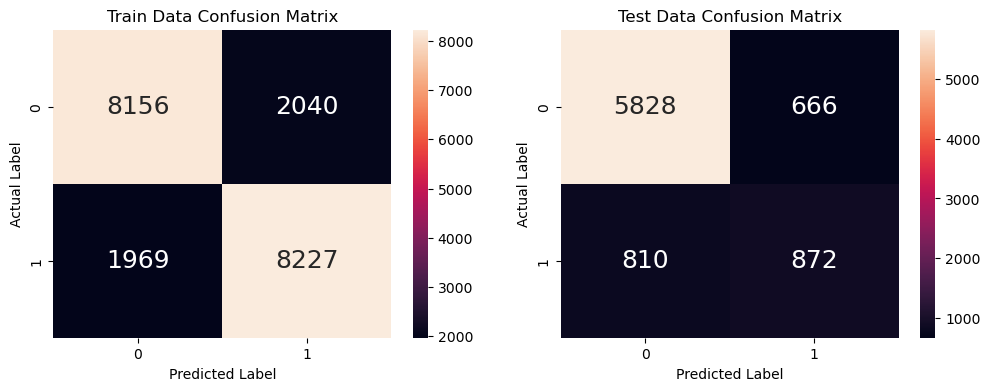

In [46]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [47]:
test_metric = {
    "Classification Model": "Adaboost + Backward Selection",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
1,Adaboost + Forward Selection,0.796600,0.672727,0.021998,0.042602
2,Adaboost (After Feature Engineering),0.812378,0.545906,0.523187,0.534305
3,Adaboost + RFE (F1) Selection,0.814824,0.554194,0.510702,0.531559
4,Adaboost + RFE (Accuracy) Selection,0.814824,0.554194,0.510702,0.531559
6,Adaboost + Backward Selection,0.819472,0.566970,0.518430,0.541615
5,Adaboost (Before Feature Engineering),0.821429,0.596187,0.409037,0.485190


#### Select K Best

In [48]:
best_k = 0
best_accuracy = 0
for i in range(1,20):
    featuresForBestRunUsingSelectKBest = select_k_best_with_mutual_info(X_train, Y_train.values.ravel(),i)
    selected_features = get_selected_features_as_list(featuresForBestRunUsingSelectKBest)
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    adaBoostModel.fit(X_train_selected, Y_train.values.ravel())
    Y_test_pred = adaBoostModel.predict(X_test_selected)
    iteration_accuracy_score = accuracy_score(Y_test, Y_test_pred)
    if iteration_accuracy_score > best_accuracy:
        best_accuracy = iteration_accuracy_score
        best_k = i

featuresForBestRunUsingSelectKBest = select_k_best_with_mutual_info(X_train, Y_train.values.ravel(),best_k)

##### Getting selected features as Array

In [49]:
selected_features = get_selected_features_as_list(featuresForBestRunUsingSelectKBest)
print(selected_features)

['lead_time_cat_0 to 50', 'lead_time_cat_150 to 200', 'lead_time_cat_200 to 300', 'lead_time_cat_greater than 300', 'avg_price_per_room_cat_100 to 150', 'avg_price_per_room_cat_50 to 100', 'booking_dayofweek_3', 'solo_traveller', 'have_special_requests', 'no_of_nights_scaled', 'no_of_previous_bookings_scaled', 'market_segment_type_corporate', 'no_of_adults_scaled', 'no_of_special_requests_scaled', 'lead_time_scaled', 'avg_price_per_room_scaled']


##### Creating training and test data using only selected features

In [50]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [51]:
adaBoostModel.fit(X_train_selected, Y_train.values.ravel())

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=47),
                   random_state=47)

In [52]:
# Predict the output based on our training and testing dataset
Y_train_pred = adaBoostModel.predict(X_train_selected)
Y_test_pred = adaBoostModel.predict(X_test_selected)

Train and Test Data Confusion Matrix:


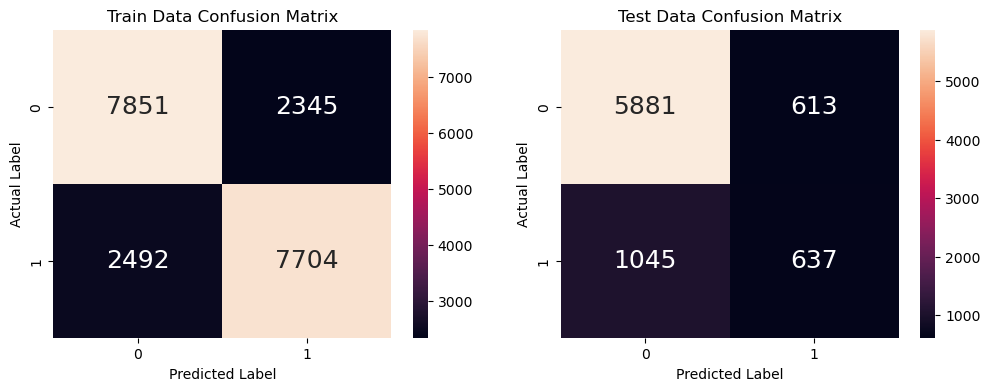

In [53]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[0])
axes[0].set_title('Train Data Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('Actual Label')

sb.heatmap(confusion_matrix(Y_test, Y_test_pred),
           annot=True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])
axes[1].set_title('Test Data Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('Actual Label')

print("Train and Test Data Confusion Matrix:")

In [54]:
test_metric = {
    "Classification Model": "Adaboost + Select K Best Selection",
    "Accuracy": accuracy_score(Y_test, Y_test_pred),
    "Precision": precision_score(Y_test, Y_test_pred),
    "Recall": recall_score(Y_test, Y_test_pred),
    "F1 Score": f1_score(Y_test, Y_test_pred)
}

# Save to overall metrics dataframe for comparison later
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)
test_metrics.sort_values(by=['Accuracy'], ascending=True,inplace=True)
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.763332,0.422724,0.411415,0.416993
1,Adaboost + Forward Selection,0.796600,0.672727,0.021998,0.042602
7,Adaboost + Select K Best Selection,0.797211,0.509600,0.378716,0.434516
2,Adaboost (After Feature Engineering),0.812378,0.545906,0.523187,0.534305
3,Adaboost + RFE (F1) Selection,0.814824,0.554194,0.510702,0.531559
4,Adaboost + RFE (Accuracy) Selection,0.814824,0.554194,0.510702,0.531559
5,Adaboost + Backward Selection,0.819472,0.566970,0.518430,0.541615
6,Adaboost (Before Feature Engineering),0.821429,0.596187,0.409037,0.485190


### Key Insights:

1. **Overall Performance**: AdaBoost models generally outperform the Decision Tree model across all metrics, indicating the strength of the AdaBoost algorithm in handling complex datasets.

2. **Best Model**: The AdaBoost with Backward Selection method shows the highest F1 Score (0.541615), which is a balanced metric considering both Precision and Recall. This model also has a high Accuracy of 0.819472, making it the best overall model among those tested.

3. **Concerns with Forward Selection**: Despite AdaBoost with Forward Selection achieving the highest Precision (0.672727), its extremely low Recall (0.021998) and consequently low F1 Score (0.042602) indicate that it is too conservative, possibly only predicting positive cases when it is highly certain, leading to many missed positive predictions.

4. **Consistency in RFE Models**: Both RFE models (based on F1 and Accuracy) show identical scores across all metrics, suggesting that the feature selection is robust in maintaining performance regardless of the selection criterion.

5. **Impact of Feature Selection**: Models utilizing feature selection techniques generally show improved performance over the basic AdaBoost model, with the exception of Forward Selection. This highlights the importance of appropriate feature selection in model efficacy.

In [55]:

final_model_performance = export_final_selected_features_to_csv(get_selected_features_as_list(featuresForBestRunUsingBackwardSelection), "Best Adaboost")

Features exported successfully to FinalModels/Feature_Selection/Best Adaboost


### Model Chosen: Backward Selection

In [56]:

selected_features = get_selected_features_as_list(featuresForBestRunUsingBackwardSelection)
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

adaBoostModel.fit(X_train_selected, Y_train.values.ravel())
Y_test_pred_after_feature_selection = adaBoostModel.predict(X_test_selected)


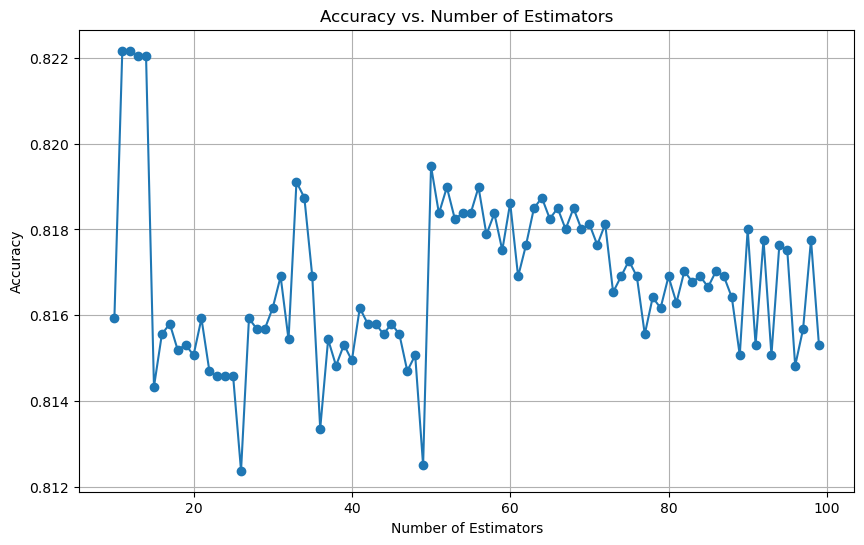

In [57]:
results = []

best_accuracy = 0
best_n = 0
best_model = None
for n in range(10, 100):
    adaBoostModel = AdaBoostClassifier(n_estimators=n, random_state=47)
    adaBoostModel.fit(X_train_selected, Y_train.values.ravel())
    Y_test_pred = adaBoostModel.predict(X_test_selected)
    iteration_accuracy_score = accuracy_score(Y_test, Y_test_pred)
    
    results.append({'n_estimators': n, 'accuracy': iteration_accuracy_score})
    
    if iteration_accuracy_score > best_accuracy:
        best_accuracy = iteration_accuracy_score
        best_n = n
        best_model = adaBoostModel

model_performance = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.plot(model_performance['n_estimators'], model_performance['accuracy'], marker='o')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [58]:
joblib.dump(best_model, "FinalModels/BestAdaboost.pkl") 

['FinalModels/BestAdaboost.pkl']

In [59]:
best_model.fit(X_train_selected, Y_train.values.ravel())
Y_test_pred_after_hyperparameter_tuning = best_model.predict(X_test_selected)

### Comparing models throughout evaluations

In [60]:
model_performance = pd.DataFrame(columns=['Stage', 'Accuracy', 'F1 Score'])

model_performance = model_performance.append({
    "Stage": "Initial (Before Feature Engineering)",
    "Accuracy": accuracy_score(Y_test, Y_test_pred_before_feature_engineering), 
    "F1 Score": f1_score(Y_test, Y_test_pred_before_feature_engineering)        
}, ignore_index=True)

model_performance = model_performance.append({
    "Stage": "After Feature Engineering",
    "Accuracy": accuracy_score(Y_test, Y_test_pred_after_feature_engineering), 
    "F1 Score": f1_score(Y_test, Y_test_pred_after_feature_engineering)        
}, ignore_index=True)

model_performance = model_performance.append({
    "Stage": "After Feature Selection (Best method)",
    "Accuracy": accuracy_score(Y_test, Y_test_pred_after_feature_selection), 
    "F1 Score": f1_score(Y_test, Y_test_pred_after_feature_selection)        
}, ignore_index=True)

model_performance = model_performance.append({
    "Stage": "After Hyperparameter Tuning",
    "Accuracy": accuracy_score(Y_test, Y_test_pred_after_hyperparameter_tuning), 
    "F1 Score": f1_score(Y_test, Y_test_pred_after_hyperparameter_tuning) 
}, ignore_index=True)

model_performance


/var/folders/2f/4ljc9d495xx0ns6754v3hvrm0000gn/T/ipykernel_84263/623032365.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append({
/var/folders/2f/4ljc9d495xx0ns6754v3hvrm0000gn/T/ipykernel_84263/623032365.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append({
/var/folders/2f/4ljc9d495xx0ns6754v3hvrm0000gn/T/ipykernel_84263/623032365.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_performance = model_performance.append({
/var/folders/2f/4ljc9d495xx0ns6754v3hvrm0000gn/T/ipykernel_84263/623032365.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

,Stage,Accuracy,F1 Score
0,Initial (Before Feature Engineering),0.821429,0.485190
1,After Feature Engineering,0.812378,0.534305
2,After Feature Selection (Best method),0.819472,0.541615
3,After Hyperparameter Tuning,0.822162,0.525457


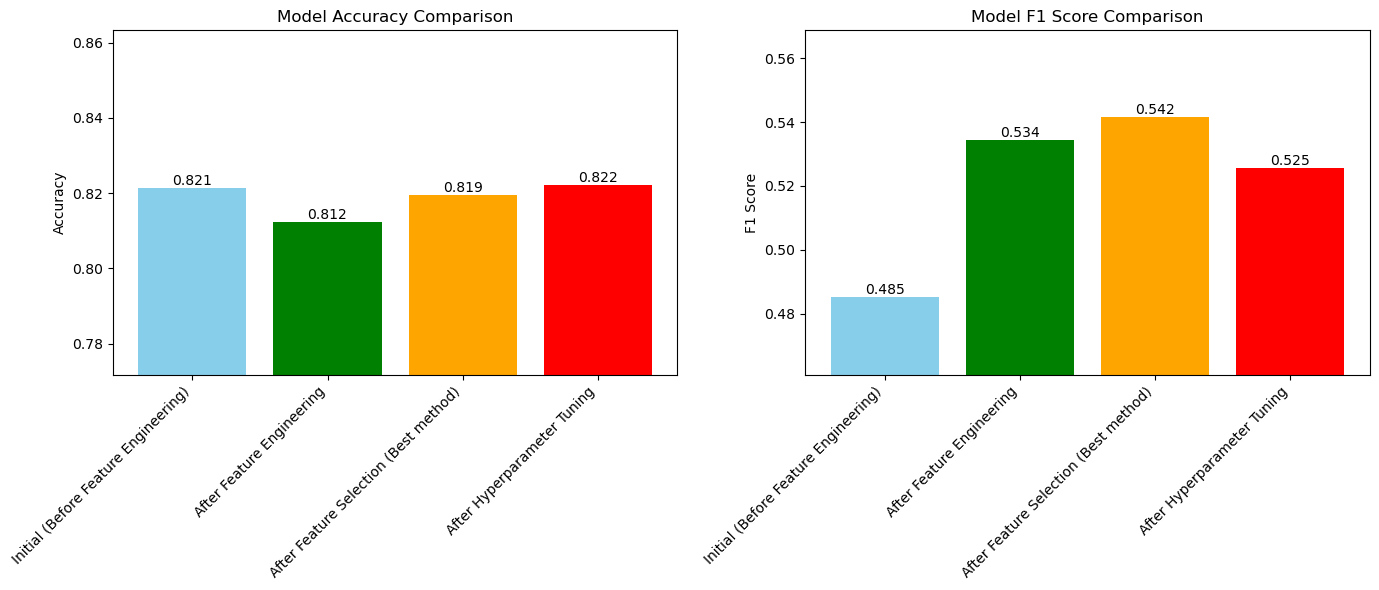

In [61]:
colors = ['skyblue', 'green', 'orange', 'red']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i in range(len(model_performance)):
    axes[0].bar(model_performance['Stage'][i], model_performance['Accuracy'][i], color=colors[i])
    axes[0].text(i, model_performance['Accuracy'][i], str(f'{model_performance["Accuracy"][i]:.3f}'), ha='center', va='bottom')

axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticks(range(len(model_performance)))
axes[0].set_xticklabels(model_performance['Stage'], rotation=45, ha='right')
axes[0].set_ylim([min(model_performance['Accuracy'])*0.95, max(model_performance['Accuracy'])*1.05])  


for i in range(len(model_performance)):
    axes[1].bar(model_performance['Stage'][i], model_performance['F1 Score'][i], color=colors[i])
    axes[1].text(i, model_performance['F1 Score'][i], str(f'{model_performance["F1 Score"][i]:.3f}'), ha='center', va='bottom')

axes[1].set_title('Model F1 Score Comparison')
axes[1].set_ylabel('F1 Score')
axes[1].set_xticks(range(len(model_performance)))
axes[1].set_xticklabels(model_performance['Stage'], rotation=45, ha='right')
axes[1].set_ylim([min(model_performance['F1 Score'])*0.95, max(model_performance['F1 Score'])*1.05])  



plt.tight_layout()  
plt.show()

## Next Steps

Now, after doing feature selection and hyperparameter tuning, the model is exported out such that we can compare this classification model (Ada Boost) with the best feature selection and hyperparameter tuning to other best classification models later.


## To Navigate To The Next Notebook:
0. [Introduction](/0%20-%20Introduction.ipynb) 
1. [Data Cleaning Notebook](/1%20-%20Data%20Cleaning.ipynb) 
2. [Exploratory Data Analyis Notebook](/2%20-%20Data%20Exploration.ipynb)
3. [Data Pre-processing Notebook](/3%20-%20Data%20Pre-Processing.ipynb)
4. [Initial Classification Models Notebook](/4%20-%20ClassificationModels.ipynb)
5. [Feature Engineering Notebook](/5%20-%20Feature%20Engineering.ipynb) 
6. Applying Feature Selection + Hyperparameter Tuning On Individual Models
   1. [Logistic Regression Notebook](/6.1%20-%20Logistic%20Regression.ipynb) 
   2. [K Nearest Neighbour Notebook](/6.2%20-%20K%20Nearest%20Neighbour.ipynb) 
   3. [Decision Tree Notebook](/6.3%20-%20Decision%20Tree.ipynb) 
   4. [Support Vector Machine Notebook](/6.4%20-%20SVM.ipynb) 
   5. [Random Forest Notebook](/6.5%20-%20Random%20Forest.ipynb) 
   6. [Adaboost Notebook](/6.6%20-%20Adaboost.ipynb) - <b>[You Are Here Now]</b>
   7. [Gradient Boost Notebook](/6.7%20-%20Gradient%20Boosting.ipynb)
   8. [LightGBM Notebook](/6.8%20-%20LightGBM.ipynb)
7.  [Final Model Comparisons + Conclusion Notebook](/7%20-%20Model%20Comparison,%20Final%20Model%20and%20Conclusion.ipynb)